<a href="https://colab.research.google.com/github/sayyed-uoft/fullstackai/blob/main/14_unsupervised_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strata.ai - Artificial Intelligence Certificate 

# Module 3: Practical Deep Learning

# Unsupervised Deep Learning

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Unsupervised Pretraining (Feature Learning)

- So far, we discussed supervised deep learning that you have enough labeled data to train neural neworks for either a classifcation or a regression task.
- We also discussed how to take advantage of pre-trained models if if you can find one that solves a similar problem (transfer learning).
- But, sometimes, you want to tackle a complex task for which you don’t have much labeled training data, and unfortunately you cannot find a model trained on a similar task. You may still be able to perform **unsupervised pretraining** if you can gather unlabeled training examples. It is often rather cheap to gather unlabeled training examples, but quite expensive to label them. If you can gather plenty of unlabeled training data, you can try to train the the entire network or layers one by one (starting with the lowest layer and then going up) using an unsupervised feature learning algorithm such as **autoencoders**.

## Autoencoders


Autoencoders are neural network architectures that are made of two parts:
1. **Encoder:** it compresses the input data to a dense feature (mapping data to a lower dimensional representation). This is very similar to PCA that we learned in Machine Learning model.
1. **Decoder:** it decomprsees the dense feature and tries to reconstruct the original input data just from that feature.



<img src="https://github.com/sayyed-uoft/fullstackai/raw/main/autoencoder.png" width="90%"/>

Autoencoders are:

- **Data-specific**, which means that they will only be able to compress data similar to what they have been trained on. 

- **Lossy**, which means that the decompressed outputs will be degraded compared to the original inputs.

- **Learned automatically** from data examples, which means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

Autoencoders are great for:

- Compressing data for visualization
- Pretaining models with unlabeled data (feature learning)
- Genereative models (e.g. data denoising)

To build an autoencoder, you need three things: an **encoding function**, a **decoding function**, and a **distance function** between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using variation of Gradient Descent.

**Note**: Usually Encoder and Decoder has similar architectures but reverse of each other:







<img src="https://github.com/sayyed-uoft/fullstackai/raw/main/autoencoder2.png" width="60%"/>

## Linear Autoencoder

A lineare autoencoder is an autoencoder that doesn't use any activation function in it's layers. 

Since no activation function is used, ther is no point of using mopre then one hidden layer (with the size of the target dimention). This autoencoder is equivalent to PCA that we learned in the ML module.



<img src="https://github.com/sayyed-uoft/fullstackai/raw/main/linear_autoencoder.png" width="50%"/>

## Autoencoder Example: Unsupervised Pretraining

We will use Fashion MNIST dataset for this example. Let's first load the dataset. We will also select only 1000 samples as an small training dataset. The rest of the samples we will use for unsupervised learning:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train_small, X_train_nolabel = X_train_full[5000:6000], X_train_full[6000:]
y_train_small = y_train_full[5000:6000]

4423680/4422102 [==============================] - 0s 0us/step


Let's create our model (the original model we used):

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Now, let's train the model with all labeled trraining data: 

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4968 - accuracy: 0.5750 - val_loss: 1.0055 - val_accuracy: 0.7110
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8677 - accuracy: 0.7317 - val_loss: 0.7534 - val_accuracy: 0.7652
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7166 - accuracy: 0.7673 - val_loss: 0.6670 - val_accuracy: 0.7880
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6452 - accuracy: 0.7884 - val_loss: 0.6063 - val_accuracy: 0.8046
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5995 - accuracy: 0.8034 - val_loss: 0.5686 - val_accuracy: 0.8200
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5670 - accuracy: 0.8131 - val_loss: 0.5419 - val_accuracy: 0.8256
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5428 - accuracy: 0.8209 - val_loss: 0.5200 - val_accuracy:

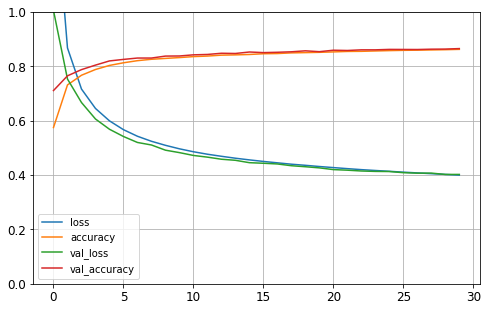

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Let's assume we have only 1000 labeled samples (excluding validation set) and train the same network:

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_small, y_train_small, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 18ms/step - loss: 2.4482 - accuracy: 0.1500 - val_loss: 2.3475 - val_accuracy: 0.1468
Epoch 2/30
32/32 [==============================] - 0s 11ms/step - loss: 2.3041 - accuracy: 0.1540 - val_loss: 2.2408 - val_accuracy: 0.1644
Epoch 3/30
32/32 [==============================] - 0s 10ms/step - loss: 2.2133 - accuracy: 0.1600 - val_loss: 2.1699 - val_accuracy: 0.1774
Epoch 4/30
32/32 [==============================] - 0s 14ms/step - loss: 2.1483 - accuracy: 0.2020 - val_loss: 2.1154 - val_accuracy: 0.1988
Epoch 5/30
32/32 [==============================] - 0s 11ms/step - loss: 2.0960 - accuracy: 0.2380 - val_loss: 2.0687 - val_accuracy: 0.2546
Epoch 6/30
32/32 [==============================] - 0s 13ms/step - loss: 2.0501 - accuracy: 0.2990 - val_loss: 2.0276 - val_accuracy: 0.3114
Epoch 7/30
32/32 [==============================] - 0s 11ms/step - loss: 2.0088 - accuracy: 0.3550 - val_loss: 1.9891 - val_accuracy: 0.3598
Epoch 8/30
32

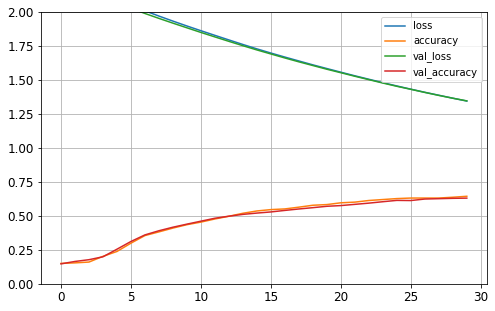

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

Obviously, there is not enough data and we get very bad validation accuracy. 

Let's pretrain the model by using an autoencoder network. For the encoder, we use the exact newtork we used above (except the output layer) and we use the reverse of that for the decoder.

This is a regression problem and we will use MSE loss. Because the output is bounded (between 0 and 1), we will juse sigmoid activation function for the output layer.

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# input vector (flatten image)
input_img = keras.Input(shape=[784])

# Encoder layers (excluding output layer)
e_hidden_1 = keras.layers.Dense(300, activation='relu')(input_img)
encoded = keras.layers.Dense(100, activation='relu')(e_hidden_1)

# Decoder layers
d_hidden_1 = keras.layers.Dense(300, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(d_hidden_1)

# Autoencoder model
autoencoder = keras.Model(inputs=[input_img], outputs=[decoded])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               235984    
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='mean_squared_error', 
                    optimizer = keras.optimizers.Nadam())
                    #optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
X_train_nolabel.shape

(54000, 28, 28)

We didn't use Flatten layer so the output shape and the input shape are the same. So, we need to reshape the training data first.

In [ ]:

X_flatten = X_train_nolabel.reshape(-1, 784)
X_valid_flatten = X_valid.reshape(-1, 784)
(X_flatten.shape, X_valid_flatten.shape)

((54000, 784), (5000, 784))

Lst's train the sutoencoder with only training data (no labels) for both input and output:

In [ ]:
history = autoencoder.fit(X_flatten, X_flatten, epochs=30,
                    validation_data=(X_valid_flatten, X_valid_flatten))

Epoch 1/30
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0212 - val_loss: 0.0130
Epoch 2/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0118 - val_loss: 0.0105
Epoch 3/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 4/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 5/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 6/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 7/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 8/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 9/30
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 10/30
1688/1688 [==============================] - 22s 13m

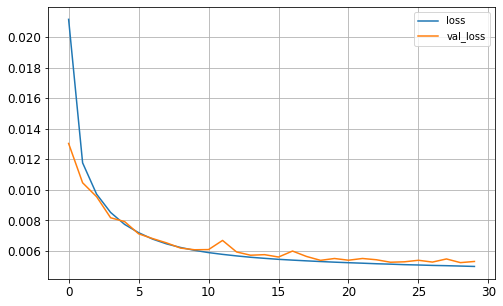

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

The learning cureves show that the autoencoder netowrk leanned very well.

???????

Now, let'ss add the softmax layer on top of the pre-trained encoder to make the classification model (similar to the model we used for fully supervised learning).

First, we will freeze the pretained layers and only train the softmax layer using the small training set:

In [ ]:
# Adding the softmax layer on top of the encoder
cls_output = keras.layers.Dense(10, activation="softmax")(encoded)

# Creating the classification model
model = keras.Model(inputs=[input_img], outputs=[cls_output])

# Freeze the layers
e_hidden_1.trainable = False
encoded.trainable = False

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
X_flatten = X_train_small.reshape(-1, 784)
X_flatten.shape

(1000, 784)

In [ ]:
history = model.fit(X_flatten, y_train_small, epochs=30,
                    validation_data=(X_valid_flatten, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 20ms/step - loss: 3.2028 - accuracy: 0.1420 - val_loss: 2.6024 - val_accuracy: 0.1898
Epoch 2/30
32/32 [==============================] - 0s 10ms/step - loss: 2.3879 - accuracy: 0.2160 - val_loss: 2.2140 - val_accuracy: 0.2712
Epoch 3/30
32/32 [==============================] - 0s 10ms/step - loss: 2.0665 - accuracy: 0.2900 - val_loss: 1.9359 - val_accuracy: 0.3268
Epoch 4/30
32/32 [==============================] - 0s 10ms/step - loss: 1.8358 - accuracy: 0.3510 - val_loss: 1.7248 - val_accuracy: 0.3866
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 1.6596 - accuracy: 0.3920 - val_loss: 1.5690 - val_accuracy: 0.4526
Epoch 6/30
32/32 [==============================] - 0s 10ms/step - loss: 1.5215 - accuracy: 0.4570 - val_loss: 1.4588 - val_accuracy: 0.4866
Epoch 7/30
32/32 [==============================] - 0s 13ms/step - loss: 1.4154 - accuracy: 0.4950 - val_loss: 1.3551 - val_accuracy: 0.5210
Epoch 8/30
32

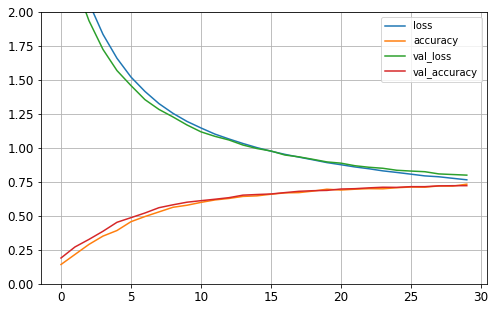

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

As you can see we were able to increase the validation accuracy by 10 points. That's a big jump!! Thanks to unsupervised pre-training.

Now, let's unfreeze all the layers and finetune them:

In [ ]:
# UnFreeze the layers
e_hidden_1.trainable = True
encoded.trainable = True

# Train again with lower learning rate
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-4),
              metrics=["accuracy"])

history = model.fit(X_flatten, y_train_small, epochs=30,
                    validation_data=(X_valid_flatten, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 22ms/step - loss: 0.7570 - accuracy: 0.7240 - val_loss: 0.7964 - val_accuracy: 0.7230
Epoch 2/30
32/32 [==============================] - 0s 10ms/step - loss: 0.7548 - accuracy: 0.7240 - val_loss: 0.7949 - val_accuracy: 0.7244
Epoch 3/30
32/32 [==============================] - 0s 10ms/step - loss: 0.7533 - accuracy: 0.7260 - val_loss: 0.7933 - val_accuracy: 0.7248
Epoch 4/30
32/32 [==============================] - 0s 11ms/step - loss: 0.7521 - accuracy: 0.7240 - val_loss: 0.7916 - val_accuracy: 0.7276
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 0.7510 - accuracy: 0.7250 - val_loss: 0.7906 - val_accuracy: 0.7278
Epoch 6/30
32/32 [==============================] - 0s 10ms/step - loss: 0.7500 - accuracy: 0.7260 - val_loss: 0.7897 - val_accuracy: 0.7288
Epoch 7/30
32/32 [==============================] - 0s 13ms/step - loss: 0.7492 - accuracy: 0.7250 - val_loss: 0.7886 - val_accuracy: 0.7284
Epoch 8/30
32

We increased the validation accuracy by one point.

# Unsupervised Pretaining Layer by Layer

Another option is to try to train the layers one by one, starting with the lowest layer and then going up, using autoencoders. Once all layers have been trained this way, you can add the output layer for your task, and fine-tune the final network using supervised learning (i.e., with the labeled training examples). At this point, you can unfreeze all the pretrained layers, or just some of the upper ones.

<img src="https://github.com/sayyed-uoft/fullstackai/raw/main/pretraining_layers.png" width="60%"/>